In [1]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.utils.np_utils import to_categorical
import random

from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D

Using TensorFlow backend.


In [2]:
import os
import pprint
import tensorflow.compat.v1 as tf

if 'COLAB_GPU_ADDR' not in os.environ:
    print('ERROR: Not connected to a GPU runtime; please see the first cell in this notebook for instructions!')
else:
    GPU_address = 'grpc://' + os.environ['COLAB_GPU_ADDR']
    print ('GPU address is', tpu_address)

    with tf.Session(gpu_address) as session:
      devices = session.list_devices()

    print('GPU_devices:')
    pprint.pprint(devices)

ERROR: Not connected to a GPU runtime; please see the first cell in this notebook for instructions!


In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

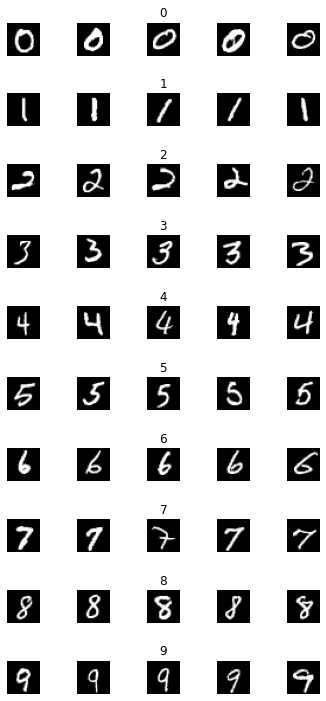

In [5]:

num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


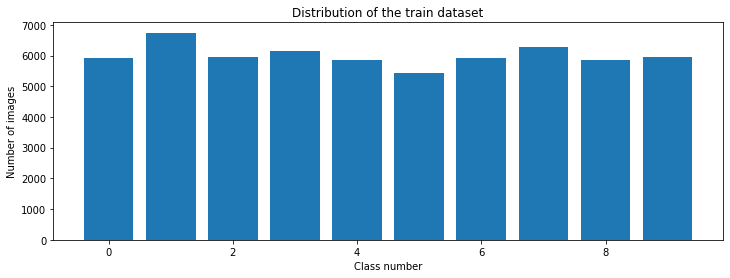

In [6]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
#Encoding categorical variables and Normalizing
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [0]:
#Defining large model (Was defined for signatures on check)
 #Le_Net Model
def LeNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
model = LeNet_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [10]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 1s 7ms/step - loss: 0.5025 - accuracy: 0.8480 - val_loss: 0.0924 - val_accuracy: 0.9740
Epoch 2/10
135/135 [==============================] - 1s 5ms/step - loss: 0.1129 - accuracy: 0.9661 - val_loss: 0.0606 - val_accuracy: 0.9817
Epoch 3/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0782 - accuracy: 0.9762 - val_loss: 0.0489 - val_accuracy: 0.9867
Epoch 4/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0626 - accuracy: 0.9806 - val_loss: 0.0398 - val_accuracy: 0.9885
Epoch 5/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0533 - accuracy: 0.9837 - val_loss: 0.0375 - val_accuracy: 0.9887
Epoch 6/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0476 - accuracy: 0.9853 - val_loss: 0.0405 - val_accuracy: 0.9877
Epoch 7/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0411 - accuracy: 0.9868 - val_loss: 0.0337 - val_accuracy: 0.9895
Epoch 

Text(0.5, 0, 'epoch')

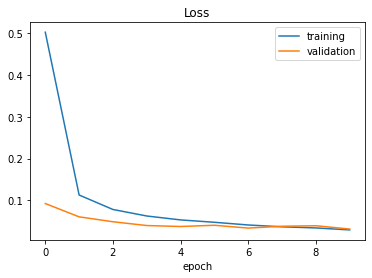

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

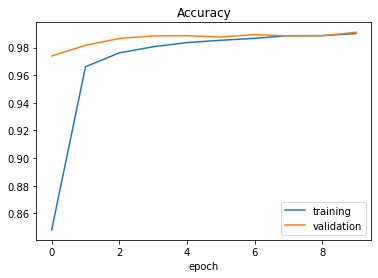

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test Score: ', score[0])
print('Test accuracy: ', score[1])


Test Score:  0.026009153574705124
Test accuracy:  0.9908999800682068


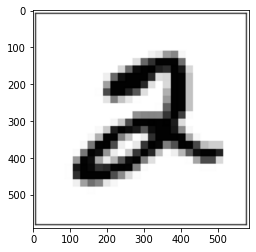

In [14]:
#Predicting image
import requests
from PIL import Image
url = 'https://raw.githubusercontent.com/rohan-varma/rohan-blog/master/images/mnistimg.png'
 
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

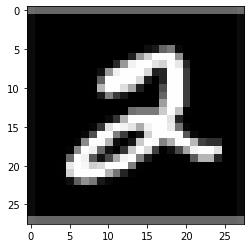

In [15]:
#Preprocessing using openCV
import cv2
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [16]:
#Normalizing and reshaping
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

(1, 28, 28, 1)


In [17]:
print(img.shape)
print("predicted digit: "+str(model.predict_classes(img)))

(1, 28, 28, 1)
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted digit: [2]


In [19]:
#Checking for the features that has been extracted from the convolution layers
from tensorflow.python.keras.models import Model #Model class API
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output) #1st conv layer
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output) #2nd conv layer

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer1.shape)

(1, 24, 24, 30)
(1, 24, 24, 30)


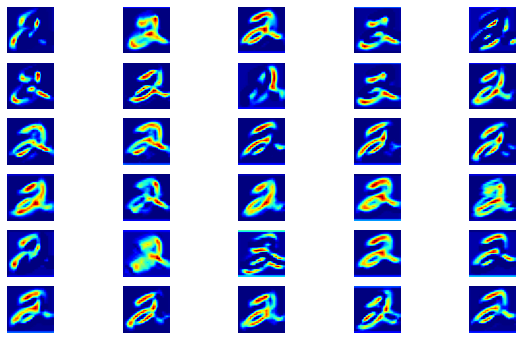

In [21]:
plt.figure(figsize = (10, 6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')

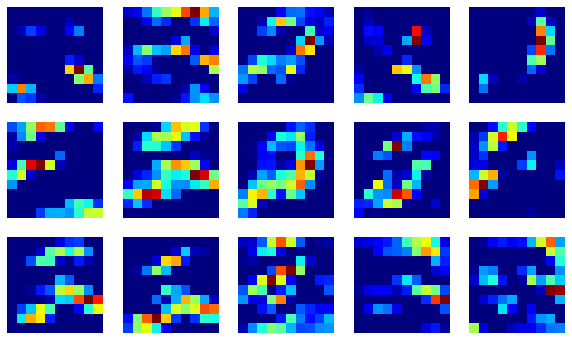

In [22]:
plt.figure(figsize = (10, 6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')